C:\Users\akshit rajput\AppData\Local\Temp\ipykernel_18980\792604551.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_final, palette='viridis')


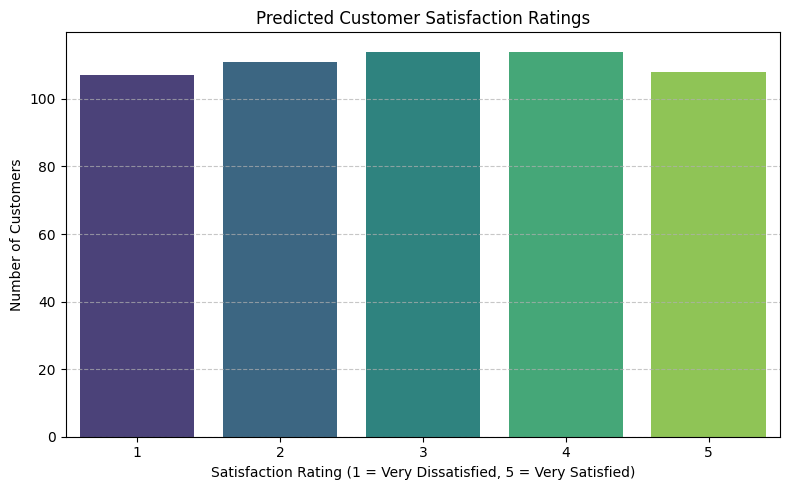

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
df = pd.read_csv("customer_support_tickets.csv")

# Step 2: Drop rows where target is missing
df = df.dropna(subset=['Customer Satisfaction Rating'])

# Step 3: Convert target to 0-based classes (1-5 → 0-4)
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].astype(int) - 1

# Step 4: Drop unnecessary columns
df = df.drop(columns=['Ticket ID', 'Customer Name', 'Customer Email', 
                      'Ticket Description', 'Resolution', 
                      'Date of Purchase', 'First Response Time', 'Time to Resolution'])

# Step 5: Encode categorical columns
categorical_cols = ['Customer Gender', 'Product Purchased', 'Ticket Type', 
                    'Ticket Subject', 'Ticket Status', 'Ticket Priority', 'Ticket Channel']

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Step 6: Split data
X = df.drop(columns=['Customer Satisfaction Rating'])
y = df['Customer Satisfaction Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the model
model = XGBClassifier()
model.fit(X_train, y_train)

# Step 8: Predict
y_pred = model.predict(X_test)

# Step 9: Convert predictions back to 1–5 scale
y_pred_final = y_pred + 1


plt.figure(figsize=(8, 5))
sns.countplot(x=y_pred_final, palette='viridis')
plt.title("Predicted Customer Satisfaction Ratings")
plt.xlabel("Satisfaction Rating (1 = Very Dissatisfied, 5 = Very Satisfied)")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()